# Homoscedasticity
- This assumption means that the variance around the regression line is the same for all values of the predictor variable (X). 

- The plot shows a __violation of this assumption. __

- For the lower values on the X-axis, the points are all very near the regression line. For the higher values on the X-axis, there is much more variability around the regression line.

> Homoscedasticity is just a fancy word for "equal variances". Homo/Heteroscedasticity is a hard word to pronounce!! But not a difficult concept to understand.

>For example: _annual income_ might be a heteroscedastic variable when predicted by age, because most teens aren't flying around in jets or buying companies or running companies as CEOs etc.

> More commonly, teen workers earn close to the minimum wage, so there isn't a lot of variability during the teen years. 

> However, as teens turn into 20-somethings, and then into 30-somethings, and then into 40-something... some will tend to shoot-up the tax brackets, while others will increase more gradually (or perhaps not at all, unfortunately). 

> Put simply, the gap between the "haves" and the "have-nots" is likely to widen with age.

> If the above were true, a plot of the association between age and income would demonstrate heteroscedasticity, like this:

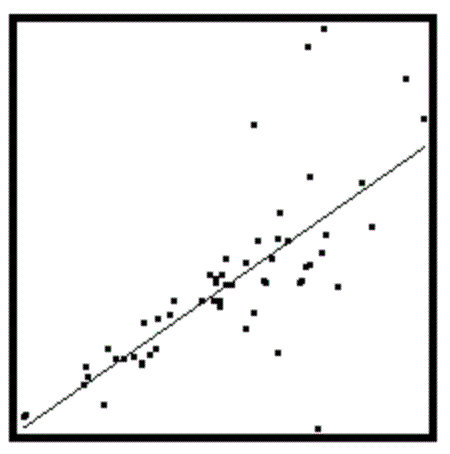

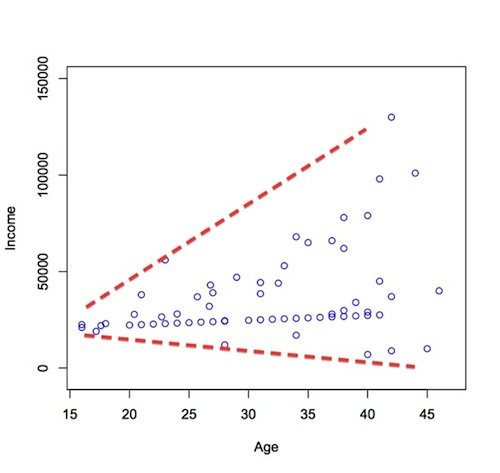

- Take a look at its Greek roots.

> - homo ... means (same)
> - schedastic ... means (scatter)

- So, homoscedasticity literally means“ having the same scatter.” In terms of your data, that simply translates into having data values that are scattered, or spread out, to about the same extent.

#### Detecting heteroscedasticity using statsmodels
One of the issues that we face when running a linear regression is that of heteroscedasticity.

Heteroscedasticity is a term used to describe a condition where there is an uneven variance across our error term.

#### What Causes Heteroscedasticity?
There are various causes for the presence of heteroscedasticity in our regression model. Some of them are:

- The presence of outliers in our data.
- If we have mixing observations with different measures of scale (such as mixing high-income households with low-income households).
- When we use an incorrect transformation of data to perform the regression.

#### What are the consequences of Heteroscedasticity?
- If heteroscedasticity exists, then our OLS (ordinary least square) estimators are still unbiased and consistent but the estimators are less efficient. This makes our inferences about the regression less reliable.



In [1]:
import os;
import pandas as pd
import numpy as np

from pandas.core import datetools
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import train_test_split


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  """


In [2]:
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\gasoline.csv"

In [3]:
# load the training data 
df_training = pd.read_csv(location)

In [4]:
df_training.shape

(40, 4)

In [5]:
df_training.head()

,consumption,capacity,price,hours
0,1043,58,3.94880,12577
1,1307,60,3.95740,13452
2,1328,61,3.82150,14973
3,1341,56,3.73550,14250
4,1401,56,3.93575,13788


In [6]:
consumption = df_training['consumption']
capacity = df_training['capacity']
price = df_training['price']
hours = df_training['hours']

In [7]:
y = consumption
x = np.column_stack((capacity, price, hours))

In [8]:
x = sm.add_constant(x, prepend=True)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [10]:
results = smf.OLS(y_train, x_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     27.72
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           2.93e-08
Time:                        12:54:11   Log-Likelihood:                -181.02
No. Observations:                  30   AIC:                             370.0
Df Residuals:                      26   BIC:                             375.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.9277    531.927      0.297      0.7

From the above, our regression equation is as follows:

consumption = 157.9277 – 8.1258(capacity) + 200.3928(price) + 0.0685(hours)

#### test for heteroscedasticity using the Breusch-Pagan test

$H_0$ = No heteroscedasticity
$H_A$ = there is heteroscedasticity

Test decision

if the p-value is less than 5% then reject the $H_0$. which means there is heteroscedasticity

In [12]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']

bp = statsmodels.stats.diagnostic.het_breuschpagan(results.resid, results.model.exog)
bp

pd.DataFrame(name, bp)

,0
3.510484,Lagrange multiplier statistic
0.319405,p-value
1.148537,f-value
0.348164,f p-value


Since our p-value is greater than 0.05, this indicates that heteroscedasticity is not present, and we cannot reject the null hypothesis of homoscedasticity.